## Assignment 2 (50 marks)
#### =====================================================================================================
### Deadline: 09/28 11:59 pm
#### =====================================================================================================

### Problem 1: Perceptron Learning (15 marks)

The dataset `lab02_dataset_1.csv` has a *3-dimensional input space* and a class label of *Positive* and *Negative*. For this task, you are **not allowed** to use any *functionalities* of the `sklearn` module.

### 1.a (10 marks)

Write a function `my_perceptron()` which applies the perceptron algorithm (refer to the lecture slide covering linear separators for details of this algorithm) on the dataset to create a linear separator. `my_perceptron()` takes the dataset as its input and returns a ***3-dimensional weight vector*** which can be used to create the linear separator (assume `bias = 0`). Use the *initial weights* `w = [3.5,0.5,-2.5]`. Use a classification threshold of `99%` i.e., `my_perceptron()` will terminate once the misclassification rate is less than `1%`.

In [23]:
import pandas as pd
import numpy as np

def my_perceptron(X, y, max_epochs=10000, threshold=0.99):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float)
    w = np.array([3.5, 0.5, -2.5], dtype=float)

    n = len(y)
    for epoch in range(max_epochs):
        errors = 0
        for xi, yi in zip(X, y):
            pred = np.sign(np.dot(w, xi))
            if pred == 0:  
                pred = 1.0
            if pred != yi:
                w = w + yi * xi
                errors += 1

        accuracy = 1 - errors / n
        if accuracy >= threshold:
            print(f"Stopped after {epoch+1} epochs with accuracy {accuracy:.2%}")
            break

    return w
df = pd.read_csv("lab02_dataset_1.csv")
X = df[["X", "Y", "Z"]].to_numpy()
y = df["Class"].map({"Positive": 1, "Negative": -1}).to_numpy()
w_final = my_perceptron(X, y)
print("Final weight vector:", w_final)


Stopped after 1 epochs with accuracy 99.50%
Final weight vector: [0.14536582 2.30319913 0.34978878]


### 1.b (5 marks)

Create a *3D plot* which showcases the dataset in a 3D-space alongwith the *linear separator* you obtained from `my_perceptron()`. Use two different colors to represent the data points belonging in the two classes for ease of viewing.

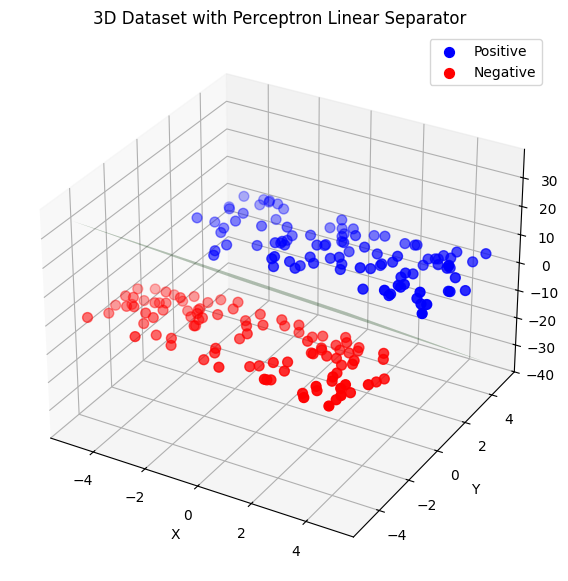

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
pos = df[df["Class"] == "Positive"]
neg = df[df["Class"] == "Negative"]

# Create a mesh grid over X and Y to plot the separating plane
x_range = np.linspace(df["X"].min(), df["X"].max(), 20)
y_range = np.linspace(df["Y"].min(), df["Y"].max(), 20)
Xg, Yg = np.meshgrid(x_range, y_range)
w1, w2, w3 = w_final
Zg = -(w1 * Xg + w2 * Yg) / w3
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos["X"], pos["Y"], pos["Z"], c='blue', label='Positive', s=50)
ax.scatter(neg["X"], neg["Y"], neg["Z"], c='red', label='Negative', s=50)
ax.plot_surface(Xg, Yg, Zg, color='green', alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Dataset with Perceptron Linear Separator')
ax.legend()
plt.show()


### Problem 2: SVM Classification (35 marks)

`lab02_dataset_2.xlsx` contains the claim history of 27,513 homeowner policies. The following table describes the eleven columns in the dataset.

| Name | Description |
| --- | --- |
| policy | Policy Identifier |
| exposure | Duration a Policy exposed in a Year |
| num_claims | Number of Claims in a Year |
| amt_claims | Total Claim Amount in a Year	|
| f_primary_age_tier | Age Tier of Primary Insured |
| f_primary_gender | Gender of Primary Insured |
| f_marital | Marital Status of Primary Insured |
| f_residence_location | Location of Residence Property |
| f_fire_alarm_type | Fire Alarm Type |
| f_mile_fire_station | Distance to Nearest Fire Station |
| f_aoi_tier | Amount of Insurance Tier |

We want to predict the *Frequency* which is the *number of claims per unit of exposure* using the above features.  We first divide the reported number of claims by the exposure. This gives us the *Frequency*.  Next, we put the policies into five groups according to their *Frequency* values. We will use this *Group* as our target variable which has five classes.

| Group | Values |
| :--- | :--- |
| 0 | Frequency = 0 |
| 1 | 0 < Frequency <= 1 |
| 2 | 1 < Frequency <= 2 |
| 3 | 2 < Frequency <= 3 |
| 4 | 3 < Frequency |

### 2.a (6 marks)
Create a new column for the dataset which will indiciate the *Frequency Group* and output the updated dataset.

In [29]:
import pandas as pd
df = pd.read_excel("./lab02_dataset_2.xlsx")
df['Frequency'] = df['num_claims'] / df['exposure']
def assign_group(freq):
    if freq == 0:
        return 0
    elif 0 < freq <= 1:
        return 1
    elif 1 < freq <= 2:
        return 2
    elif 2 < freq <= 3:
        return 3
    else:
        return 4

df['Group'] = df['Frequency'].apply(assign_group)
df.to_excel("lab02_dataset_2_with_groups.xlsx", index=False)
print("Updated dataset saved as lab02_dataset_2_with_groups.xlsx")
print(df[['policy', 'exposure', 'num_claims', 'Frequency', 'Group']].head())


Updated dataset saved as lab02_dataset_2_with_groups.xlsx
   policy  exposure  num_claims  Frequency  Group
0  P00001       1.0           0        0.0      0
1  G00002       1.0           0        0.0      0
2  A00003       1.0           2        2.0      2
3  P00004       1.0           1        1.0      1
4  G00005       1.0           1        1.0      1


### 2.b (6 marks)
There are seven categorial features in the dataset namely, *f_aoi_tier, f_primary_age_tier, f_fire_alarm_type, f_marital, f_mile_fire_station, f_primary_gender, f_residence_location*. Display all the unique values of these seven categories.

In [26]:
categorical_features = [
    "f_aoi_tier",
    "f_primary_age_tier",
    "f_fire_alarm_type",
    "f_marital",
    "f_mile_fire_station",
    "f_primary_gender",
    "f_residence_location"
]
unique_values = {col: df[col].unique().tolist() for col in categorical_features}
unique_values


{'f_aoi_tier': ['351K - 600K', '< 100K', '100K - 350K', '601K - 1M', '> 1M'],
 'f_primary_age_tier': ['21 - 27', '38 - 60', '28 - 37', '> 60', '< 21'],
 'f_fire_alarm_type': ['Alarm Service', nan, 'Standalone'],
 'f_marital': ['Married', 'Un-Married', 'Not Married'],
 'f_mile_fire_station': ['< 1 mile',
  '1 - 5 miles',
  '> 10 miles',
  '6 - 10 miles'],
 'f_primary_gender': ['Male', 'Female'],
 'f_residence_location': ['Urban', 'Suburban', 'Rural']}

### 2.c (6 marks)
We will train SVM models using those seven categorical features. However, their values are currently all categorical data, but SVM requires them to be numerical. Perform `One-hot Encoding` on these features to obtain an updated dataset which has only numerical values.

In [27]:
cat_cols = [
    "f_aoi_tier",
    "f_primary_age_tier",
    "f_fire_alarm_type",
    "f_marital",
    "f_mile_fire_station",
    "f_primary_gender",
    "f_residence_location",
]
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)
print(df_encoded.head())
print("\nEncoded dataset shape:", df_encoded.shape)

   policy  exposure  num_claims  amt_claims  Frequency  Group  \
0  P00001       1.0           0        0.00        0.0      0   
1  G00002       1.0           0        0.00        0.0      0   
2  A00003       1.0           2     3079.01        2.0      2   
3  P00004       1.0           1      804.87        1.0      1   
4  G00005       1.0           1      638.74        1.0      1   

   f_aoi_tier_100K - 350K  f_aoi_tier_351K - 600K  f_aoi_tier_601K - 1M  \
0                   False                    True                 False   
1                   False                   False                 False   
2                    True                   False                 False   
3                   False                   False                 False   
4                    True                   False                 False   

   f_aoi_tier_< 100K  ...  f_marital_Un-Married  \
0              False  ...                 False   
1               True  ...                  True   
2    

### 2.d (6 marks)
Divide the observations into training and testing partitions. Observations whose *Policy Identifier* starts with the letters A, G, and P will go to the training partition. The remaining observations go to the testing partition. Output the total number of policies present in the Training partition and Testing partition.

In [28]:
is_train = df_encoded["policy"].astype(str).str.startswith(("A", "G", "P"))
train, test = df_encoded[is_train].copy(), df_encoded[~is_train].copy()
print("Total policies in Training partition:", train.shape[0])
print("Total policies in Testing partition:", test.shape[0])

Total policies in Training partition: 20661
Total policies in Testing partition: 6852


### 2.e (6 marks)
Train an SVM model using [`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). The input features will be the encoded version of the feature set *f_aoi_tier, f_primary_age_tier, f_fire_alarm_type, f_marital, f_mile_fire_station, f_primary_gender, f_residence_location* and the output is the *Frequency Group*. Use `verbose=1` to observe the optimization steps during the training process.

In [31]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
cat_cols = [
    "f_aoi_tier",
    "f_primary_age_tier",
    "f_fire_alarm_type",
    "f_marital",
    "f_mile_fire_station",
    "f_primary_gender",
    "f_residence_location",
]
encoded_prefixes = tuple(c + "_" for c in cat_cols)
feature_cols = [c for c in df_encoded.columns if c.startswith(encoded_prefixes)]
X_train = train[feature_cols].values
y_train = train["Group"].values
X_test  = test[feature_cols].values
y_test  = test["Group"].values
svm = LinearSVC(random_state=42, max_iter=5000, verbose=1)
svm.fit(X_train, y_train)

[LibLinear]

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,1
,random_state,42


### 2.f (5 marks)
Compute and output the accuracy score on the testing partition.

In [33]:
from sklearn.metrics import accuracy_score
y_pred_test = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on Testing Partition:", test_accuracy)

Accuracy on Testing Partition: 0.5634851138353766
